# Pipeline Demo
- Download Data
- Load Data

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller, arma_order_select_ic
import itertools
import warnings


#Own packages
import download
import descriptive
import models
import model_wrapper

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

In [7]:
params = {
    'outcome_col': 'iva_neto_(mdp)_r',
    'pred_start': '2016-01-01',
    'pred_end': '2020-01-01',
    'pred_period': '12MS'
}

## Download Data

In [8]:
# download.get_files(inpc=True, fiscal_current=True, fiscal_hist=True)

## Load Data

In [9]:
fiscal_income_df = download.load_fiscal_income()
fiscal_income_df = fiscal_income_df.asfreq(freq='MS')

## Describing Data

In [10]:
fiscal_income_df.columns

Index(['ingresos_sector_publico_neto_(mdp)', 'iva_neto_(mdp)',
       'ieps_neto_(mdp)', 'ingresos_no_tributarios_neto_(mdp)',
       'ingresos_gobierno_federal_neto_(mdp)',
       'ingresos_tributarios_neto_(mdp)', 'isr_neto_(mdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mdp)_r', 'iva_neto_(mdp)_r',
       'ieps_neto_(mdp)_r', 'ingresos_no_tributarios_neto_(mdp)_r',
       'ingresos_gobierno_federal_neto_(mdp)_r',
       'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r'],
      dtype='object')

In [11]:
display(fiscal_income_df.columns)
display(fiscal_income_df.shape)
display(fiscal_income_df.isnull().any())
display(fiscal_income_df.head())
display(fiscal_income_df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

Index(['ingresos_sector_publico_neto_(mdp)', 'iva_neto_(mdp)',
       'ieps_neto_(mdp)', 'ingresos_no_tributarios_neto_(mdp)',
       'ingresos_gobierno_federal_neto_(mdp)',
       'ingresos_tributarios_neto_(mdp)', 'isr_neto_(mdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mdp)_r', 'iva_neto_(mdp)_r',
       'ieps_neto_(mdp)_r', 'ingresos_no_tributarios_neto_(mdp)_r',
       'ingresos_gobierno_federal_neto_(mdp)_r',
       'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r'],
      dtype='object')

(352, 15)

ingresos_sector_publico_neto_(mdp)        False
iva_neto_(mdp)                            False
ieps_neto_(mdp)                           False
ingresos_no_tributarios_neto_(mdp)        False
ingresos_gobierno_federal_neto_(mdp)      False
ingresos_tributarios_neto_(mdp)           False
isr_neto_(mdp)                            False
inpc_2018                                 False
ingresos_sector_publico_neto_(mdp)_r      False
iva_neto_(mdp)_r                          False
ieps_neto_(mdp)_r                         False
ingresos_no_tributarios_neto_(mdp)_r      False
ingresos_gobierno_federal_neto_(mdp)_r    False
ingresos_tributarios_neto_(mdp)_r         False
isr_neto_(mdp)_r                          False
dtype: bool

ingresos_sector_publico_neto_(mdp)  iva_neto_(mdp)  \
fecha                                                            
1990-01-01                           15527.708        2092.649   
1990-02-01                           12748.535        1796.237   
1990-03-01                           14284.656        2005.865   
1990-04-01                           14074.744        2032.419   
1990-05-01                           14048.018        2060.314   

            ieps_neto_(mdp)  ingresos_no_tributarios_neto_(mdp)  \
fecha                                                             
1990-01-01         1040.445                            7923.974   
1990-02-01          887.693                            7192.572   
1990-03-01          800.115                            8635.537   
1990-04-01          860.166                            7489.060   
1990-05-01          801.122                            8258.059   

            ingresos_gobierno_federal_neto_(mdp)  \
fecha                                              
1990-01-01                             10861.811   
1990-02-01                              8522.032   
1990-03-01                              8296.806   
1990-04-01                              9702.308   
1990-05-01                              8834.236   

            ingresos_tributarios_neto_(mdp)  isr_neto_(mdp)  inpc_2018  \
fecha                                                                    
1990-01-01                         7603.734        3897.608   7.776037   
1990-02-01                         5555.963        2299.732   7.952120   
1990-03-01                         5649.119        2082.503   8.092310   
1990-04-01                         6585.684        3020.333   8.215472   
1990-05-01                         5789.959        2311.738   8.358838   

            ingresos_sector_publico_neto_(mdp)_r  iva_neto_(mdp)_r  \
fecha                                                                
1990-01-01                         199686.644977      26911.509279   
1990-02-01                         160316.182784      22588.153009   
1990-03-01                         176521.365862      24787.298311   
1990-04-01                         171319.977379      24738.920801   
1990-05-01                         168061.859137      24648.331263   

            ieps_neto_(mdp)_r  ingresos_no_tributarios_neto_(mdp)_r  \
fecha                                                                 
1990-01-01       13380.144148                         101902.468989   
1990-02-01       11162.973098                          90448.485841   
1990-03-01        9887.349940                         106712.880324   
1990-04-01       10470.074600                          91158.005417   
1990-05-01        9584.131563                          98794.345822   

            ingresos_gobierno_federal_neto_(mdp)_r  \
fecha                                                
1990-01-01                           139683.113372   
1990-02-01                           107166.795228   
1990-03-01                           102527.042122   
1990-04-01                           118098.004986   
1990-05-01                           105687.373565   

            ingresos_tributarios_neto_(mdp)_r  isr_neto_(mdp)_r  
fecha                                                            
1990-01-01                       97784.175988      50123.319228  
1990-02-01                       69867.696943      28919.735143  
1990-03-01                       69808.485539      25734.345578  
1990-04-01                       80161.971962      36763.963965  
1990-05-01                       69267.513315      27656.213575

ingresos_sector_publico_neto_(mdp)  iva_neto_(mdp)  ieps_neto_(mdp)  \
count                          352.000000      352.000000       352.000000   
mean                        178691.439147    28908.803784      6712.549968   
std                         137825.704445    23164.948952     12215.370159   
min                          12748.535000     1796.237000    -40485.066000   
25%                          56511.095500     7427.295000      1064.180500   
50%                         148864.589500    23701.243000      3107.447085   
75%                         284114.699750    44888.798612      9342.124000   
85%                         327256.770435    56353.126597     15589.634648   
95%                         425787.902600    74426.980305     32852.311435   
99%                         514036.231670    83434.382496     38734.504564   
max                         719218.859000    99012.424200     45378.363760   

       ingresos_no_tributarios_neto_(mdp)  \
count                          352.000000   
mean                         93515.994462   
std                          73426.901415   
min                           7192.572000   
25%                          30375.018250   
50%                          84446.537000   
75%                         145851.403550   
85%                         167968.401140   
95%                         194225.447650   
99%                         331003.160186   
max                         469672.857900   

       ingresos_gobierno_federal_neto_(mdp)  ingresos_tributarios_neto_(mdp)  \
count                            352.000000                       352.000000   
mean                          129484.645680                     85175.444710   
std                           104122.125162                     74267.992481   
min                             8296.806000                      5555.963000   
25%                            38304.509250                     23550.126000   
50%                           107498.729500                     63949.477500   
75%                           203699.450025                    110857.581500   
85%                           246684.088785                    171519.262550   
95%                           315551.541575                    246993.549360   
99%                           388916.231332                    288273.417547   
max                           639555.014500                    318497.355300   

       isr_neto_(mdp)   inpc_2018  ingresos_sector_publico_neto_(mdp)_r  \
count      352.000000  352.000000                            352.000000   
mean     44842.294945   54.510719                         283666.718593   
std      42370.611192   27.997773                         102619.119351   
min       2082.503000    7.776037                         149787.417013   
25%      10685.149500   30.906083                         192201.604920   
50%      29094.310500   57.062979                         264424.828916   
75%      65551.318535   77.857744                         359539.366527   
85%      89724.417936   86.835034                         385144.536973   
95%     129757.644630   97.146876                         440036.806662   
99%     173803.201991  103.048910                         595036.296710   
max     204305.311500  103.531000                         759290.495921   

       iva_neto_(mdp)_r  ieps_neto_(mdp)_r  \
count        352.000000         352.000000   
mean       44197.228611       11670.799419   
std        19035.441364       14151.509793   
min        16586.129701      -61322.528046   
25%        26311.379716        4537.520755   
50%        42419.467436       11675.108624   
75%        57471.790020       18802.166030   
85%        65890.008774       25381.354589   
95%        77590.946700       34871.139582   
99%        88611.366829       43048.383815   
max       100220.076422       44010.516895   

       ingresos_no_tributarios_neto_(mdp)_r  \
count                            352.000000   
mean                

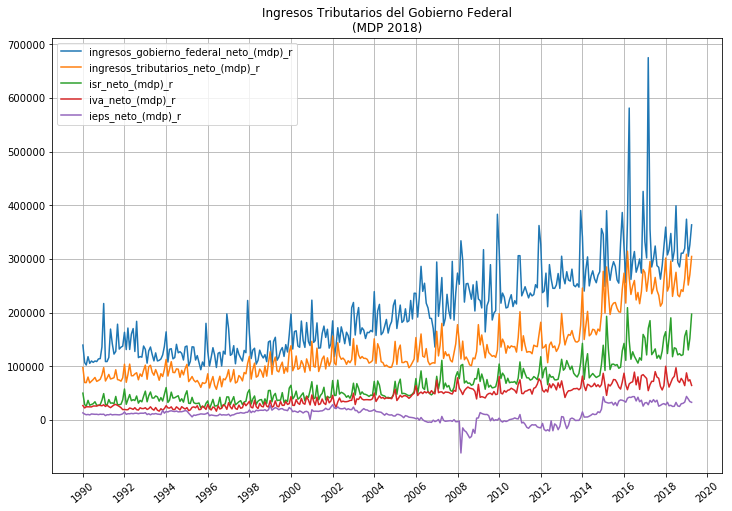

In [12]:
to_plot = ['ingresos_gobierno_federal_neto_(mdp)_r', 'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r',
           'iva_neto_(mdp)_r', 'ieps_neto_(mdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MDP 2018)', ticks = 'yearly', ticks_freq=2)

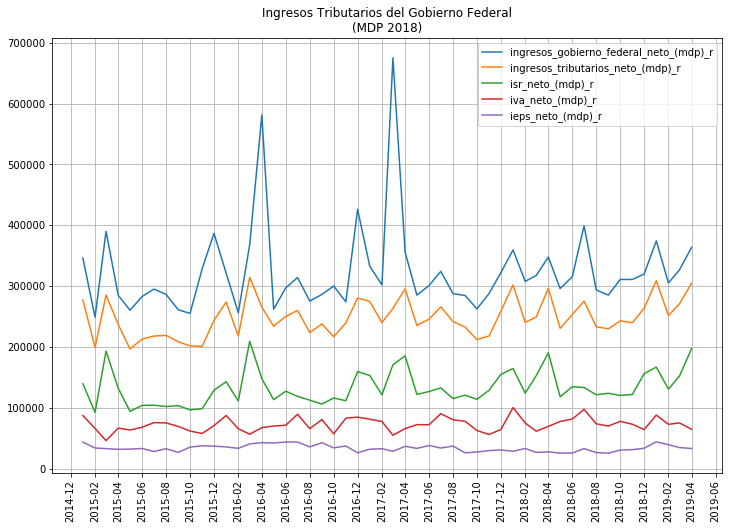

In [13]:
to_plot = ['ingresos_gobierno_federal_neto_(mdp)_r', 'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r',
           'iva_neto_(mdp)_r', 'ieps_neto_(mdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MDP 2018)', ticks = 'monthly', ticks_freq=2, min_date='2015-01-01')

## Decomposition Naive

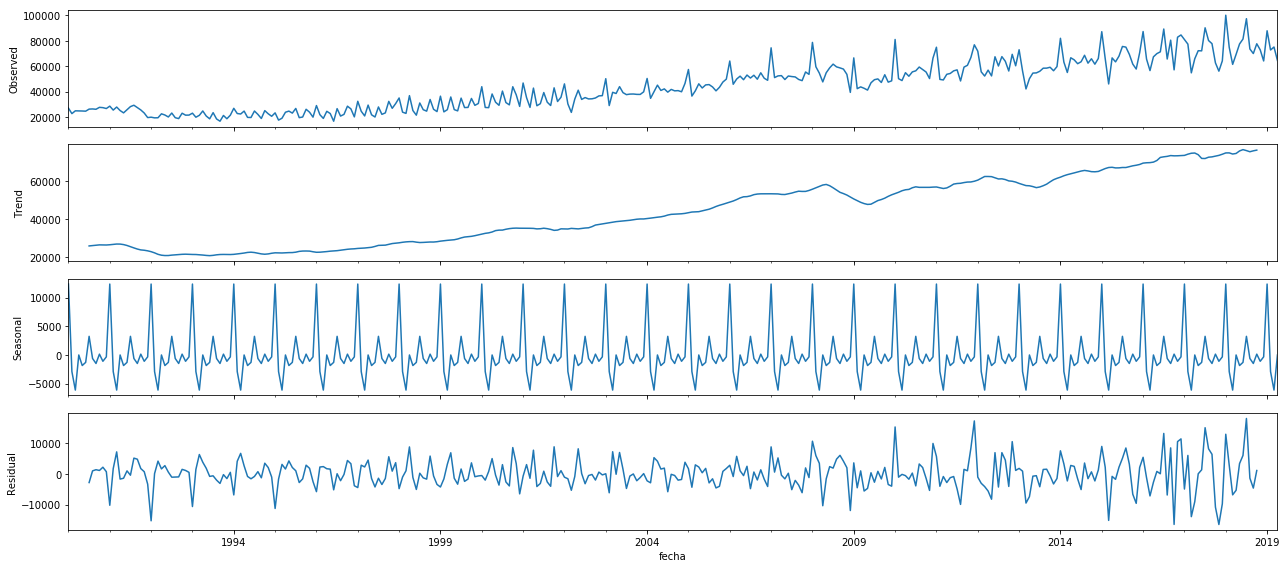

statsmodels.tsa.seasonal.DecomposeResult

In [14]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fiscal_income_df[params['outcome_col']], model='additive')
fig = decomposition.plot()
plt.show()
type(decomposition)

Se ve tendencia positiva en ingresos tributarios y estacionalidad. 

### Zoom a estacionalidad

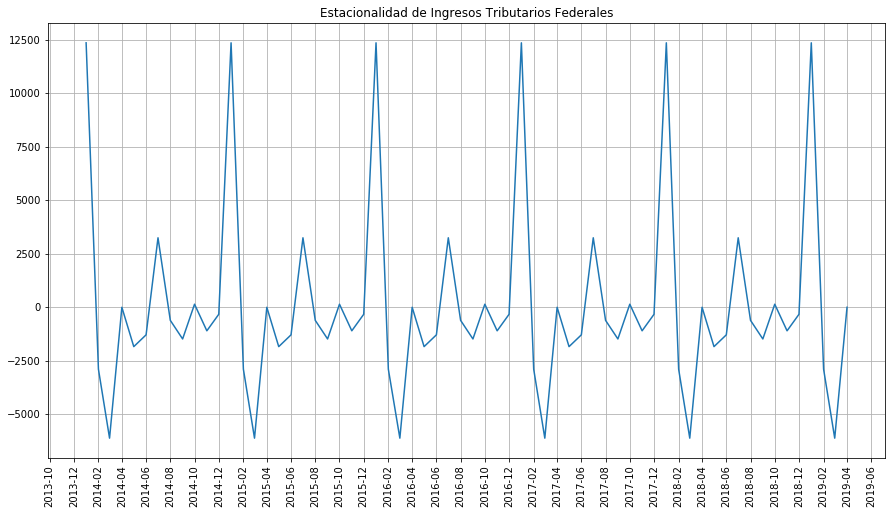

In [15]:
descriptive.plot_series(decomposition.seasonal, title='Estacionalidad de Ingresos Tributarios Federales',
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 2, min_date= '2014-01-01')

Se ve tendencia positiva de ingresos fiscales, así como fuerte componente estacional.Diciembre y Enero son los meses con mayores ingresos, Febrero siempre tiene una caida muy fuerte. Marzo es también de altos ingresos, y los demás meses se mantienen oscilando en niveles bajos y medios. 

## Hodrick Prescot

In [16]:
cycle, trend = sm.tsa.filters.hpfilter(fiscal_income_df[params['outcome_col']], 129600)
hp_decomp = fiscal_income_df[[params['outcome_col']]].copy()
hp_decomp["cycle"] = cycle
hp_decomp["trend"] = trend

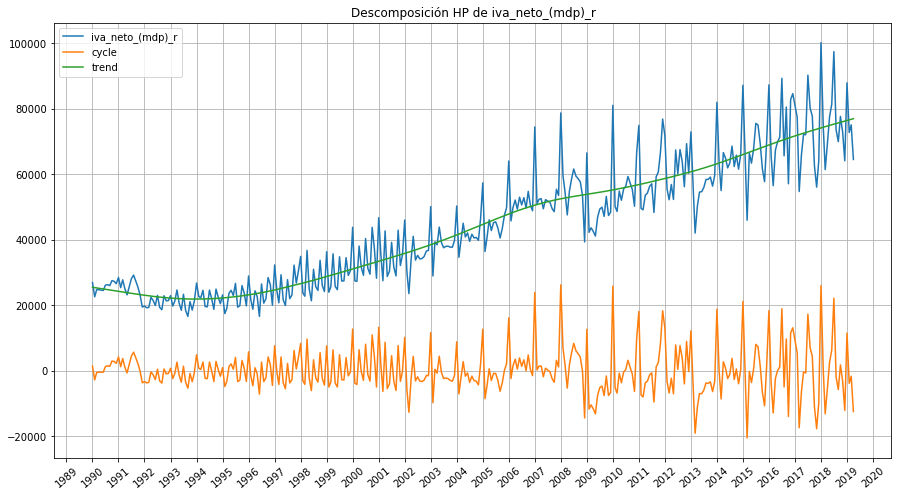

In [17]:
descriptive.plot_series(hp_decomp, title='Descomposición HP de {}'.format(params['outcome_col']),
                        figsize=(15, 8), ticks='yearly')

### Zoom a estacionalidad

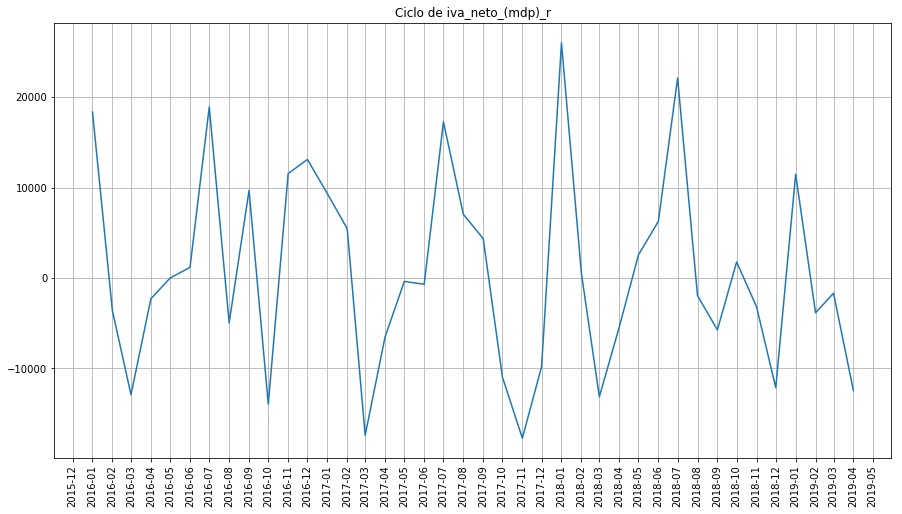

In [18]:
descriptive.plot_series(cycle, title='Ciclo de {}'.format(params['outcome_col']),
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 1, min_date= '2016-01-01')

## Testing for stationarity and transforming

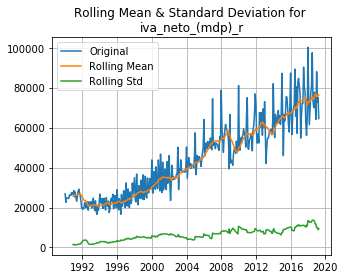

Results of Dickey-Fuller Test:
Test Statistic                   0.393532
p-value                          0.981251
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [19]:
descriptive.test_stationarity(fiscal_income_df, params['outcome_col'])


 
 TRANSFORMATION log 



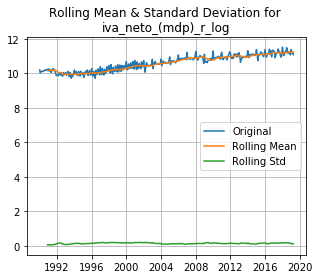

Results of Dickey-Fuller Test:
Test Statistic                  -0.091759
p-value                          0.950253
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64

 
 TRANSFORMATION diff 



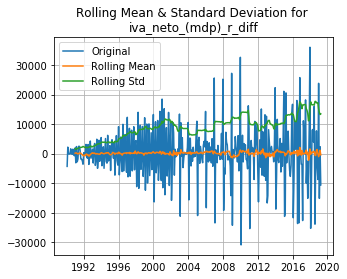

Results of Dickey-Fuller Test:
Test Statistic                -7.319596e+00
p-value                        1.203888e-10
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64

 
 TRANSFORMATION log_diff 



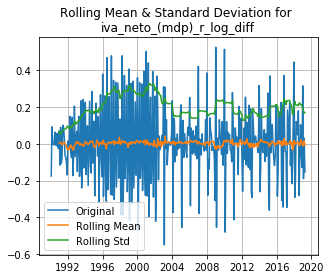

Results of Dickey-Fuller Test:
Test Statistic                -6.580338e+00
p-value                        7.542121e-09
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [20]:
transforms = ['log', 'diff', 'log_diff']
for t in transforms:
    print('\n \n TRANSFORMATION {} \n'.format(t))
    new_serie_name = params['outcome_col'] + '_' + t
    fiscal_income_df[new_serie_name] = descriptive.transformation(fiscal_income_df, params['outcome_col'], t)
    descriptive.test_stationarity(fiscal_income_df, new_serie_name)

## Stationarity results
- level: Not stationary
- log: Not stationary
- diff: Stationary
- log_diff: Stationary

Vamos a usar log diff para el análisis

# PREDICTION

In [21]:
params['transformation'] = 'log_diff'
params['arima'] = {'p': range(2, 4),
                   'q': range(2,4)}
params['sarima'] = {'p': range(2, 4),
                    'q': range(2,4),
                    'sea_p': range(0, 2),
                    'sea_q': range(0, 2),
                    'sea_s': [12],
                    'enforce_stationarity': False,
                    'enforce_invertibility': False}
params['outcome_col_transformed'] = params['outcome_col'] + '_' + params['transformation']
time_splits = pd.date_range(start='2010-01-01', end='2020-01-01', freq='12MS')

In [22]:
outcome_ts = fiscal_income_df[params['outcome_col']]
outcome_ts_tr = fiscal_income_df[params['outcome_col'] + '_' + params['transformation']]
outcome_ts_tr = outcome_ts_tr[outcome_ts_tr.notna()]

# ARIMA y SARIMA

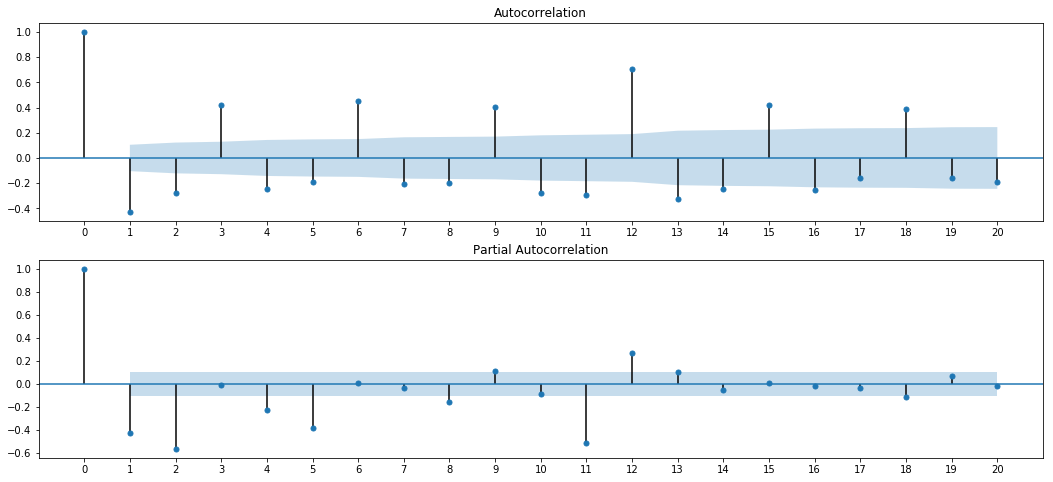

In [23]:
descriptive.plot_acf_pacf(outcome_ts_tr, 20)

### ARIMA Getting best P and Q

In [24]:
arma_order_select_ic(outcome_ts_tr, 3, 3, ic=['aic', 'bic'], trend = 'nc')

{'aic':             0           1           2           3
 0         NaN -334.188569 -332.832467 -352.075900
 1 -207.740693 -332.559168 -340.949986 -354.645513
 2 -336.552841 -347.058904 -363.442171 -438.290861
 3 -334.570210 -362.986568 -369.445162 -446.106035,
 'bic':             0           1           2           3
 0         NaN -326.466996 -321.250108 -336.632755
 1 -200.019121 -320.976810 -325.506841 -335.341582
 2 -324.970482 -331.615759 -344.138240 -415.126144
 3 -319.127065 -343.682637 -346.280445 -419.080532,
 'aic_min_order': (3, 3),
 'bic_min_order': (3, 3)}

In [25]:
p, q = params['arima']['p'], params['arima']['q']
piq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]
arima_params = [{'order': order} for order in piq]

ARIMA: order (2, 0, 2), 


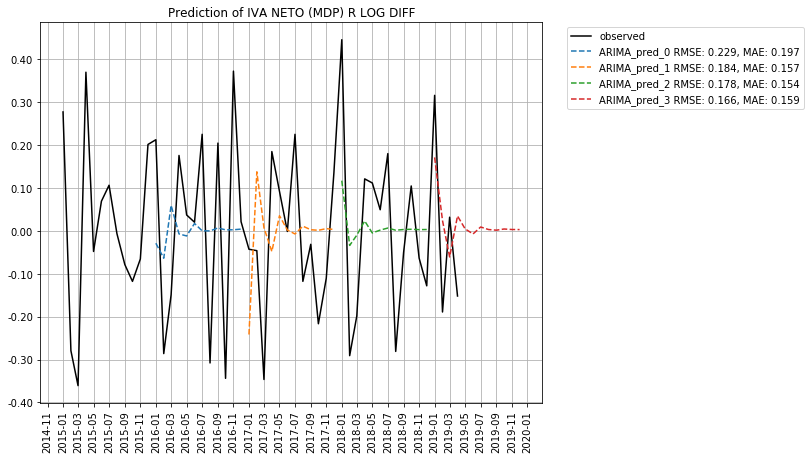

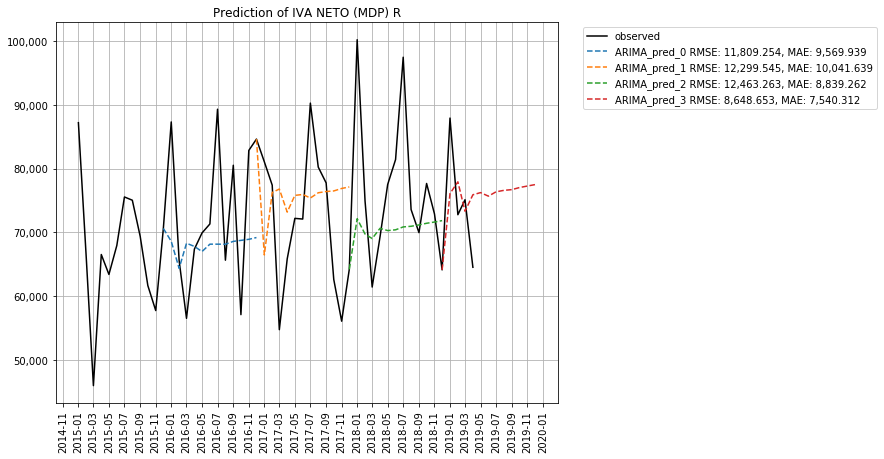

ARIMA: order (2, 0, 3), 


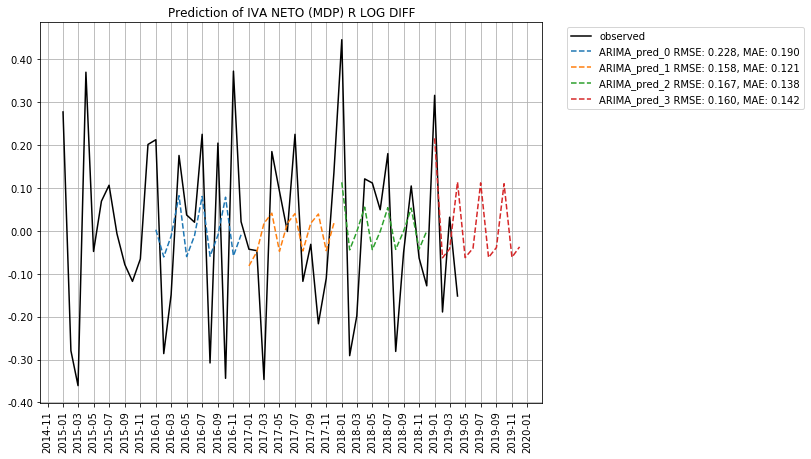

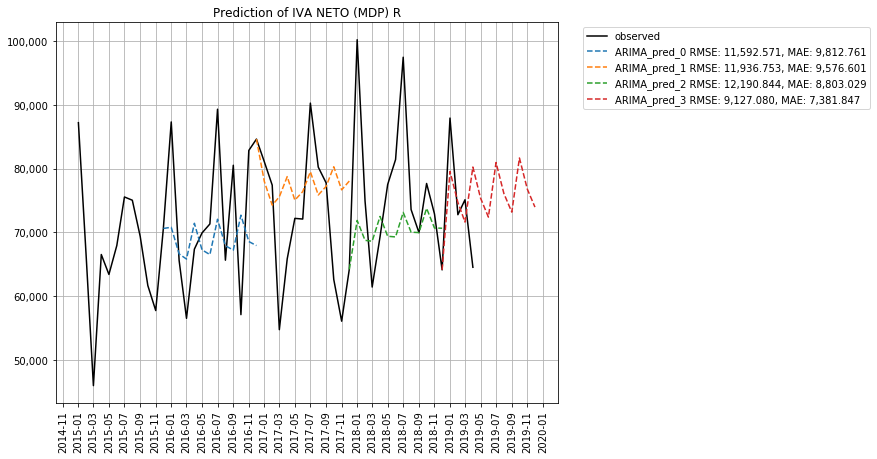

ARIMA: order (3, 0, 2), 


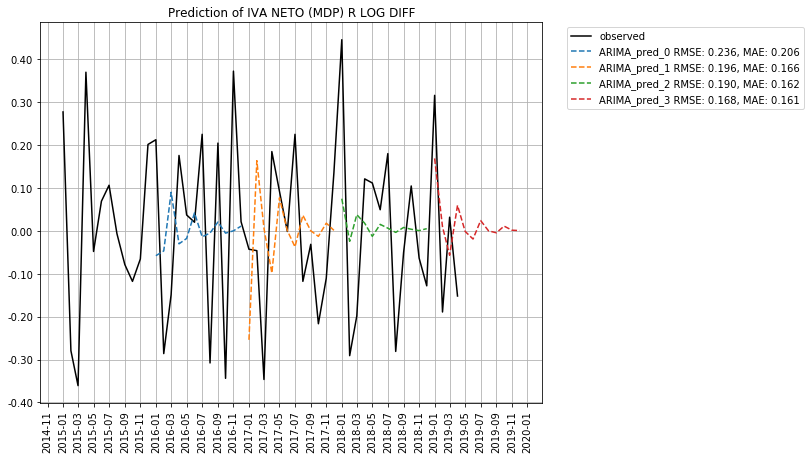

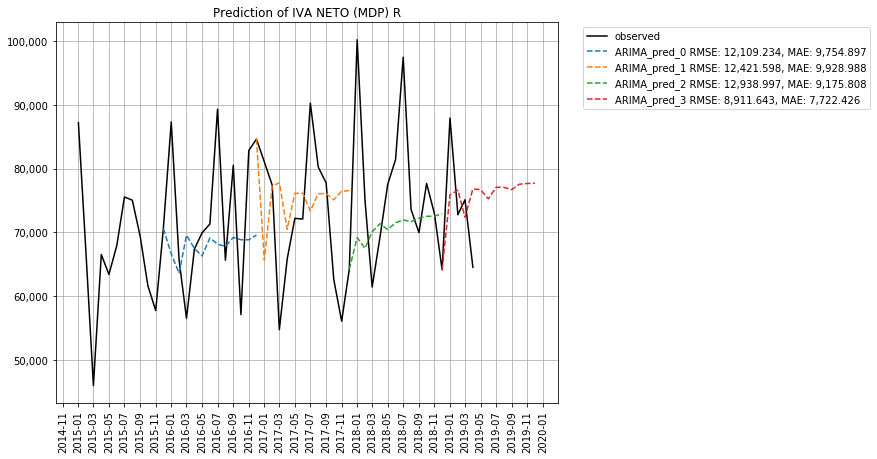

ARIMA: order (3, 0, 3), 


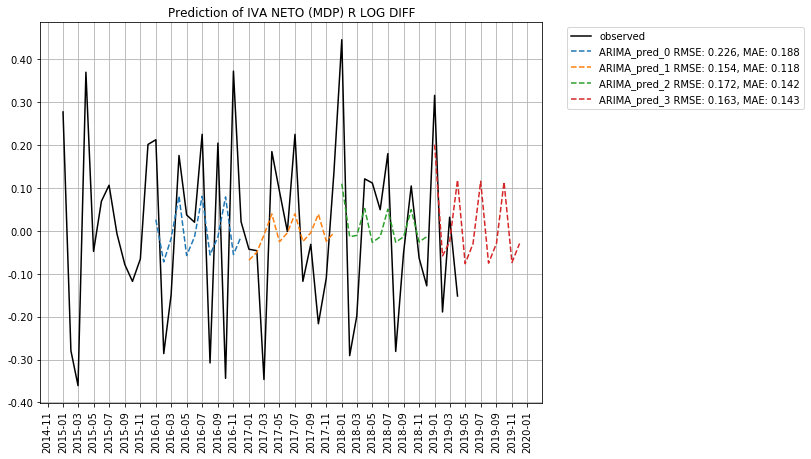

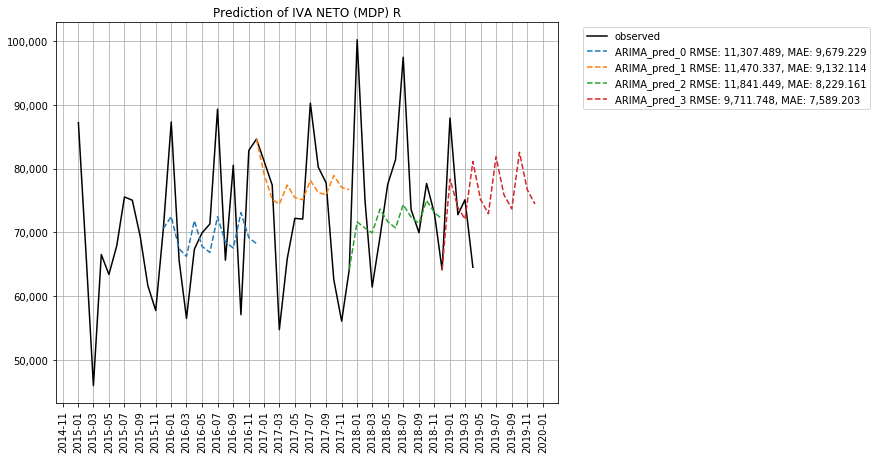

[{'model': 'ARIMA',
  'param': {'order': (2, 0, 2)},
  'split_date': None,
  'pred_period': None,
  'dynamic': None,
  'transformation': 'log_diff',
  'rmse': 0.14091401257118583,
  'mae': 0.1067613668444191},
 {'model': 'ARIMA',
  'param': {'order': (2, 0, 2)},
  'split_date': Timestamp('2016-01-01 00:00:00', freq='12MS'),
  'pred_period': '12MS',
  'dynamic': None,
  'transformation': 'log_diff',
  'rmse': 0.22873024673862621,
  'mae': 0.19746299060243763},
 {'model': 'ARIMA',
  'param': {'order': (2, 0, 2)},
  'split_date': Timestamp('2016-01-01 00:00:00', freq='12MS'),
  'pred_period': '12MS',
  'dynamic': None,
  'transformation': 'levels',
  'rmse': 11809.254194882767,
  'mae': 9569.939387943808},
 {'model': 'ARIMA',
  'param': {'order': (2, 0, 2)},
  'split_date': Timestamp('2017-01-01 00:00:00', freq='12MS'),
  'pred_period': '12MS',
  'dynamic': None,
  'transformation': 'log_diff',
  'rmse': 0.1838291060104212,
  'mae': 0.1574307085646869},
 {'model': 'ARIMA',
  'param': {'or

In [55]:
results_arima = models.run_model_joint('ARIMA', arima_params, outcome_ts,
                                       outcome_ts_tr, params)

## SARIMA Getting best P, Q and S

In [34]:
p, q = params['sarima']['p'], params['sarima']['q']
piq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]
sea_p, sea_q, sea_s =  params['sarima']['sea_p'], params['sarima']['sea_q'], params['sarima']['sea_s']
sea_piqs = [(x[0], 0, x[1], x[2]) for x in list(itertools.product(sea_p, sea_q, sea_s))]
sarima_params = [{'order': order,
                  'seasonal_order':s_order,
                  'enforce_stationarity': False,
                  'enforce_invertibility': False}\
                     for order in piq for s_order in sea_piqs]

In [35]:
sarima_aic = {'param':[], 'aic':[]}
for param in sarima_params:
    mod = sm.tsa.statespace.SARIMAX(outcome_ts_tr, **param)
    results = mod.fit(maxiter=200)
    sarima_aic['param'].append(param)
    sarima_aic['aic'].append(results.aic)

In [36]:
sarima_aic = pd.DataFrame(sarima_aic)
sarima_aic = sarima_aic.sort_values('aic')
with pd.option_context("display.max_rows", 999):
    print(sarima_aic.head().values)

[[{'order': (3, 0, 3), 'seasonal_order': (1, 0, 1, 12), 'enforce_stationarity': False, 'enforce_invertibility': False}
  -520.9396001490662]
 [{'order': (2, 0, 3), 'seasonal_order': (1, 0, 1, 12), 'enforce_stationarity': False, 'enforce_invertibility': False}
  -516.1060958143275]
 [{'order': (3, 0, 2), 'seasonal_order': (1, 0, 1, 12), 'enforce_stationarity': False, 'enforce_invertibility': False}
  -512.4204217309435]
 [{'order': (2, 0, 2), 'seasonal_order': (1, 0, 1, 12), 'enforce_stationarity': False, 'enforce_invertibility': False}
  -508.189452177372]
 [{'order': (3, 0, 3), 'seasonal_order': (1, 0, 0, 12), 'enforce_stationarity': False, 'enforce_invertibility': False}
  -495.9899694771864]]


SARIMA: order (2, 0, 2), seasonal_order (0, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


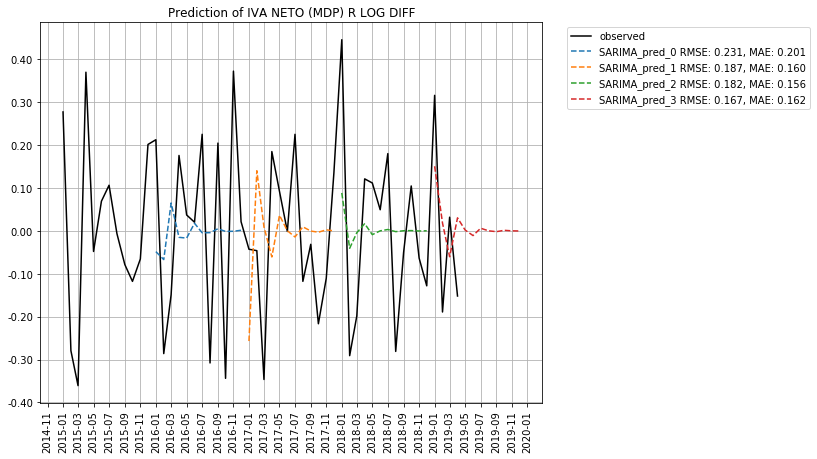

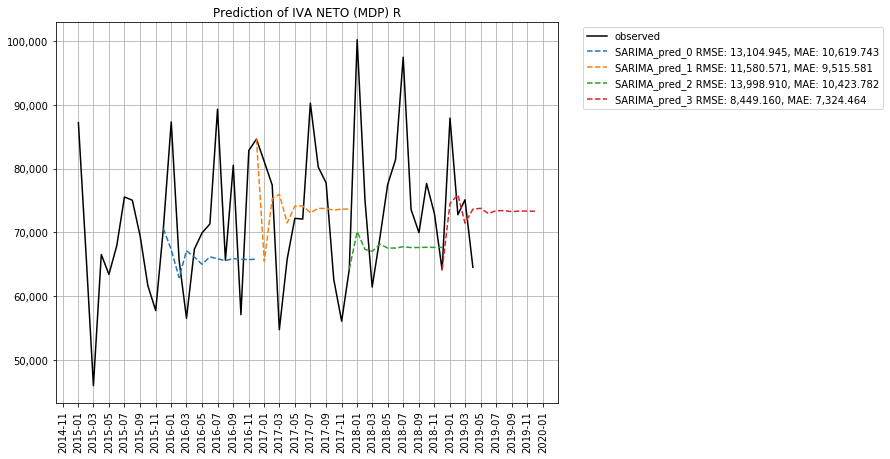

SARIMA: order (2, 0, 2), seasonal_order (0, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


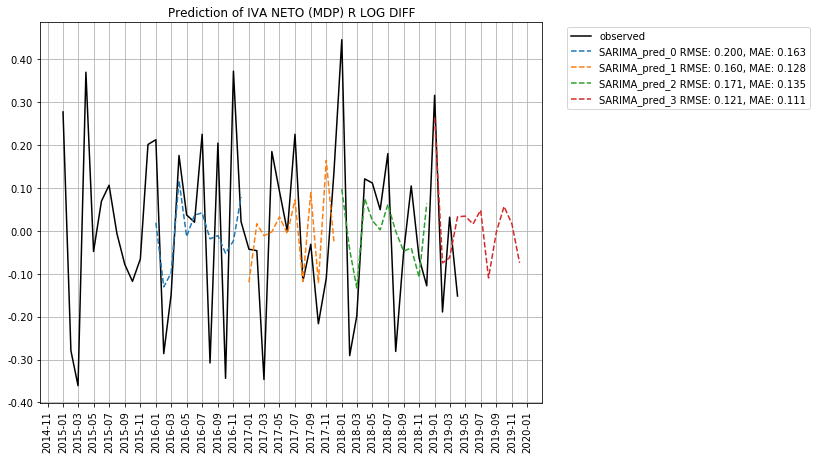

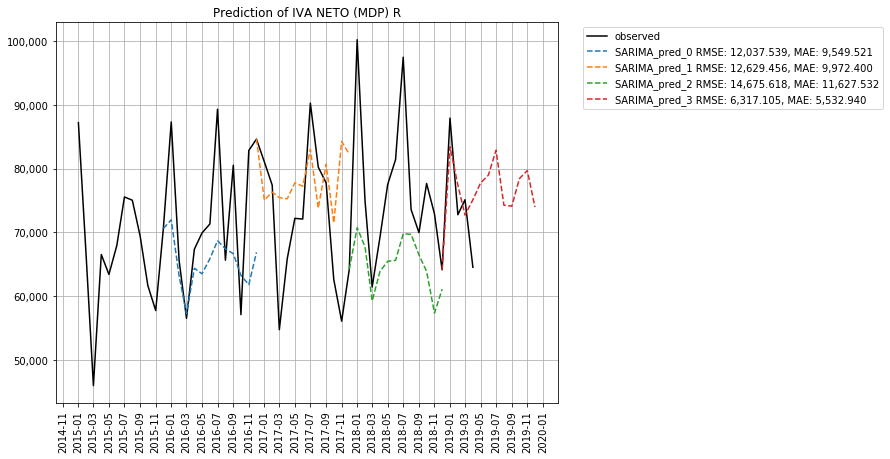

SARIMA: order (2, 0, 2), seasonal_order (1, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


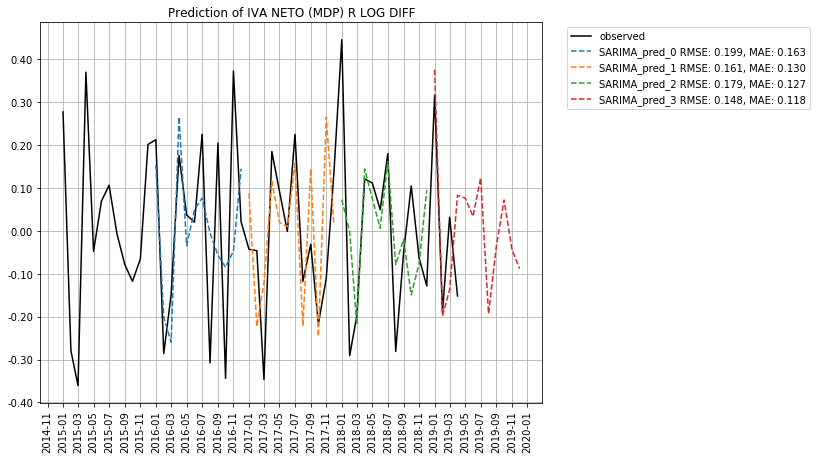

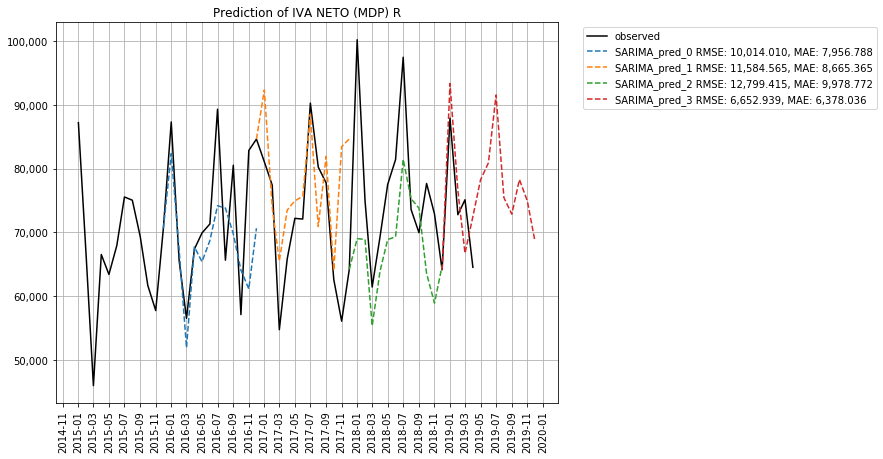

SARIMA: order (2, 0, 2), seasonal_order (1, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


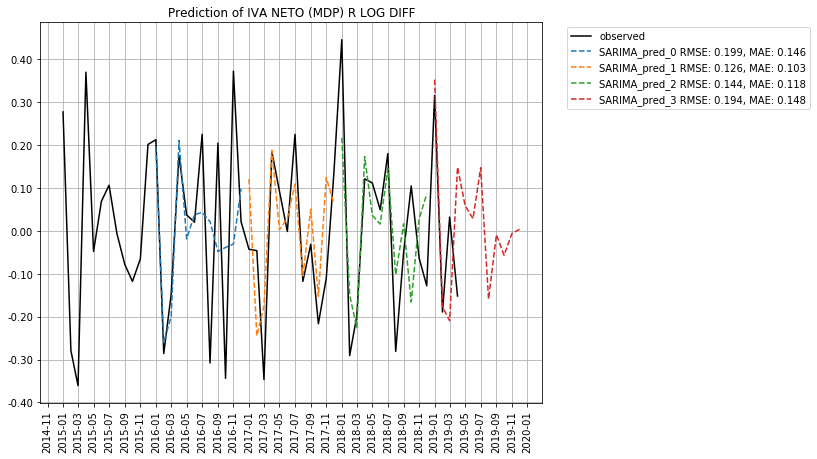

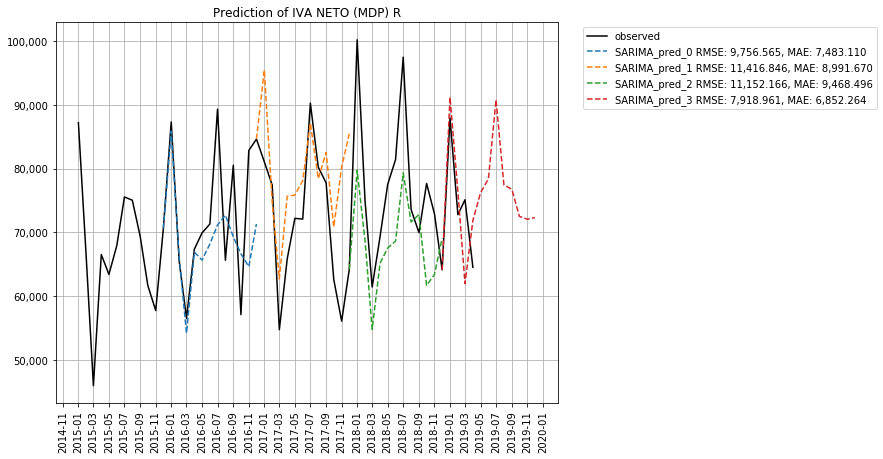

SARIMA: order (2, 0, 3), seasonal_order (0, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


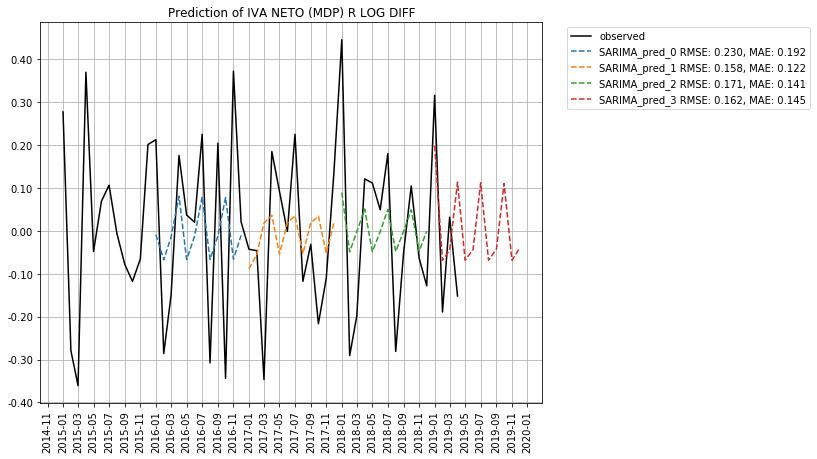

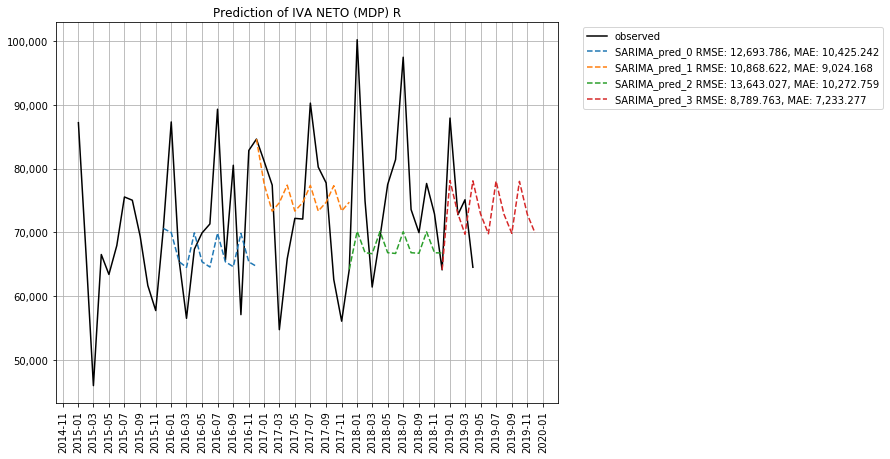

SARIMA: order (2, 0, 3), seasonal_order (0, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


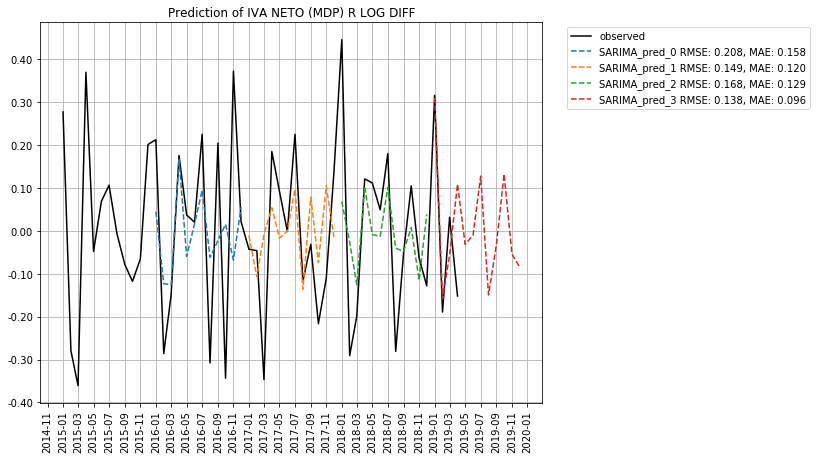

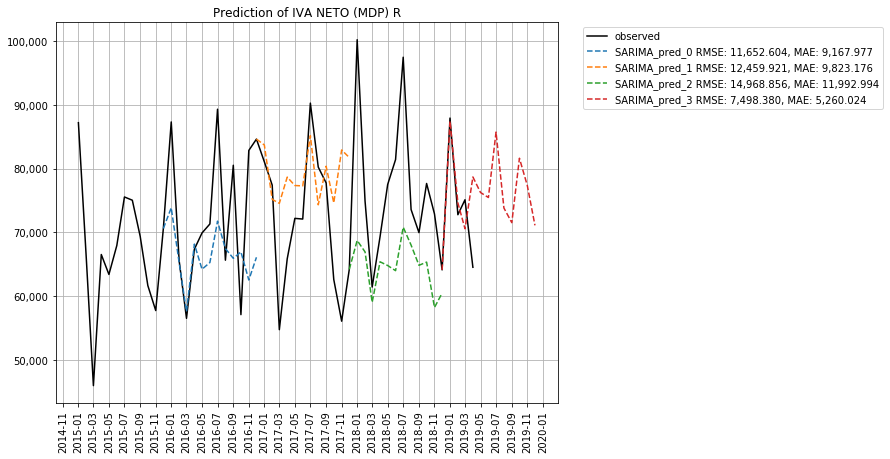

SARIMA: order (2, 0, 3), seasonal_order (1, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


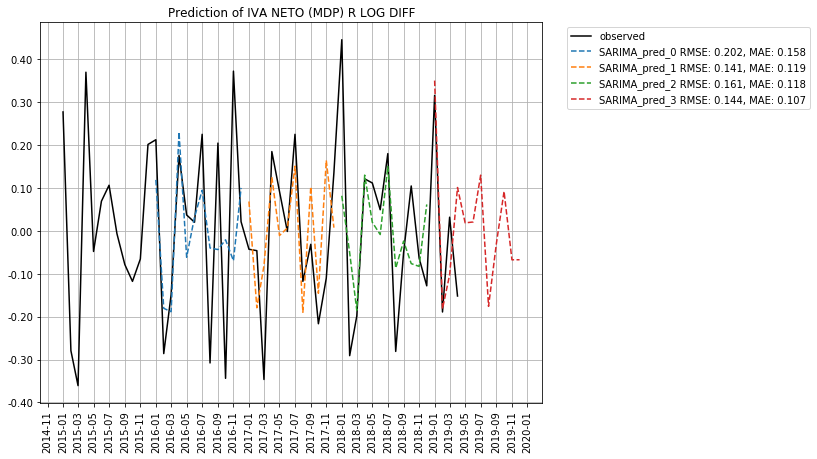

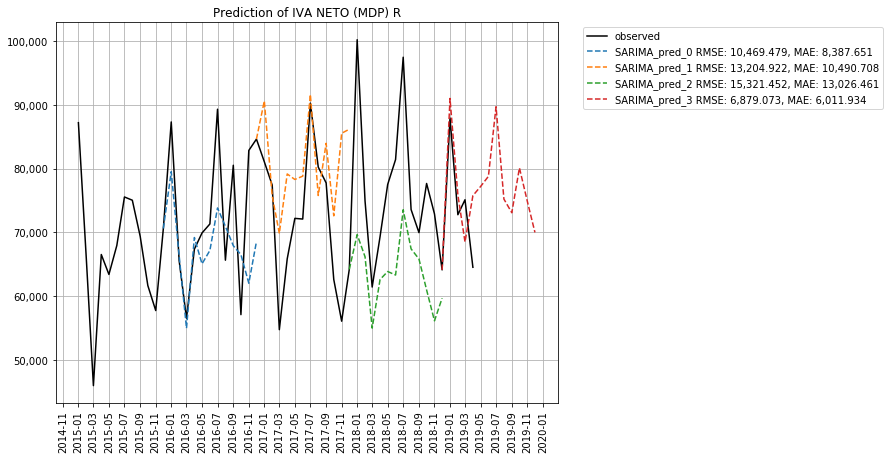

SARIMA: order (2, 0, 3), seasonal_order (1, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


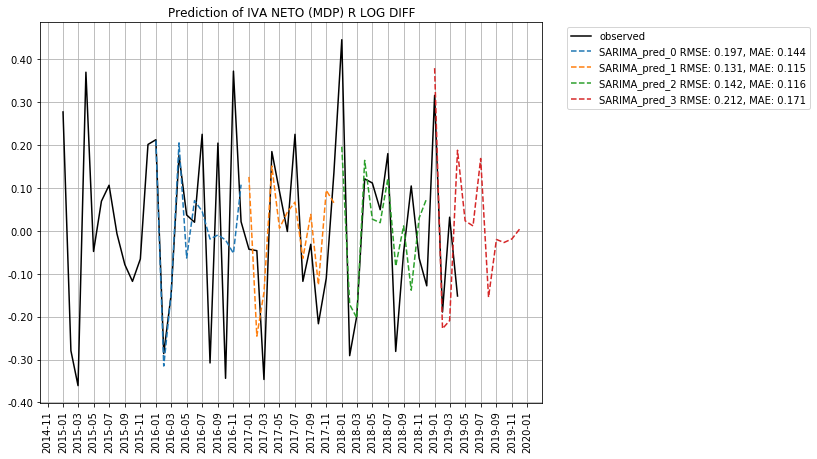

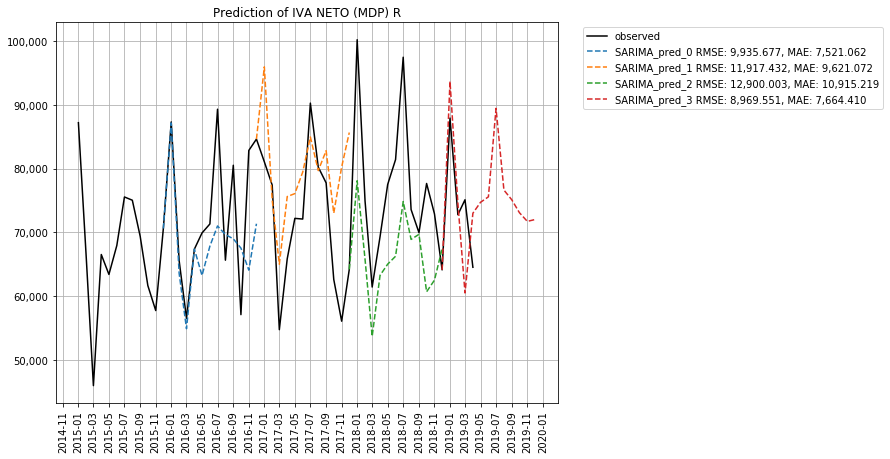

SARIMA: order (3, 0, 2), seasonal_order (0, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


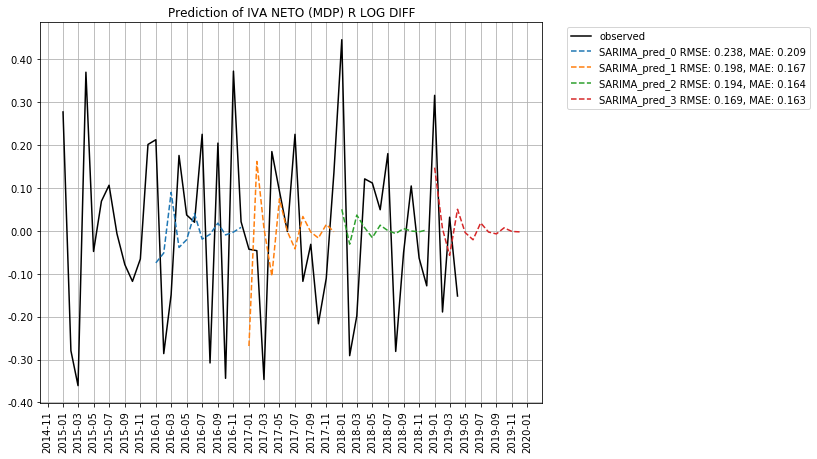

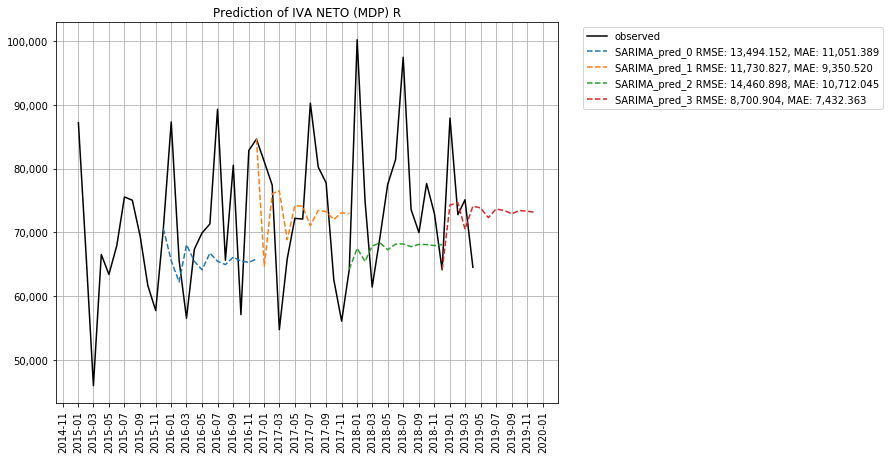

SARIMA: order (3, 0, 2), seasonal_order (0, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


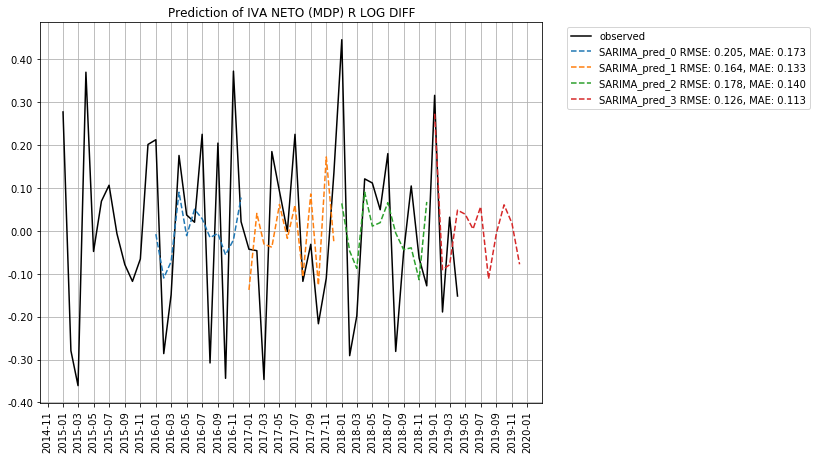

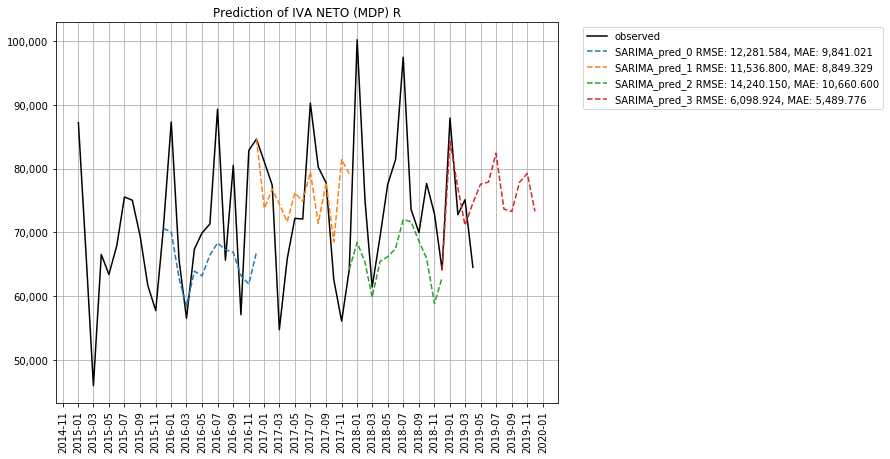

SARIMA: order (3, 0, 2), seasonal_order (1, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


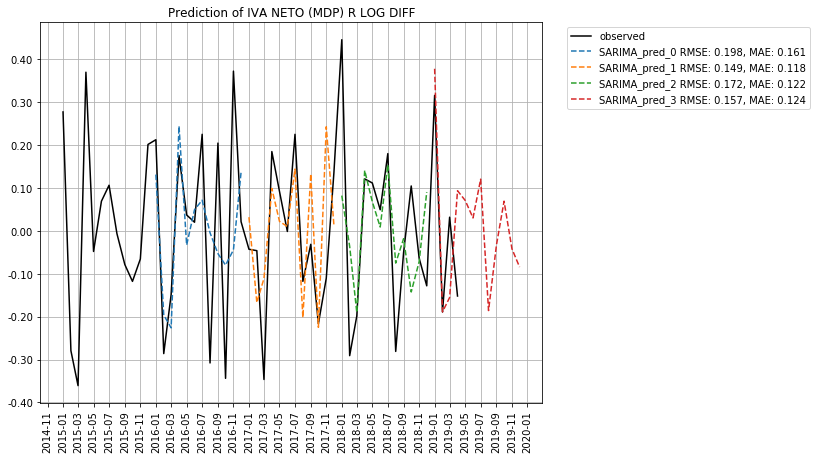

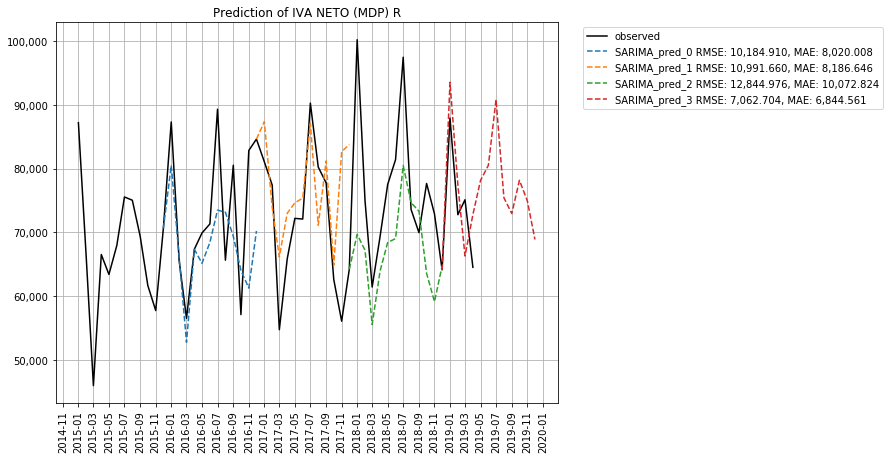

SARIMA: order (3, 0, 2), seasonal_order (1, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


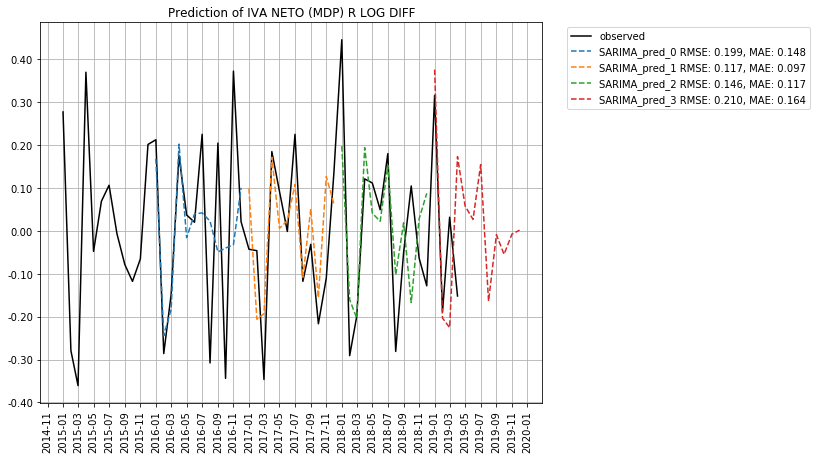

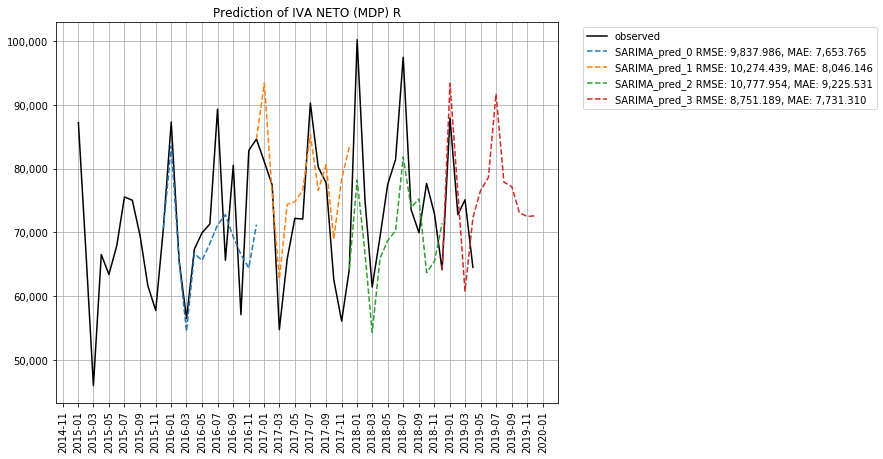

SARIMA: order (3, 0, 3), seasonal_order (0, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


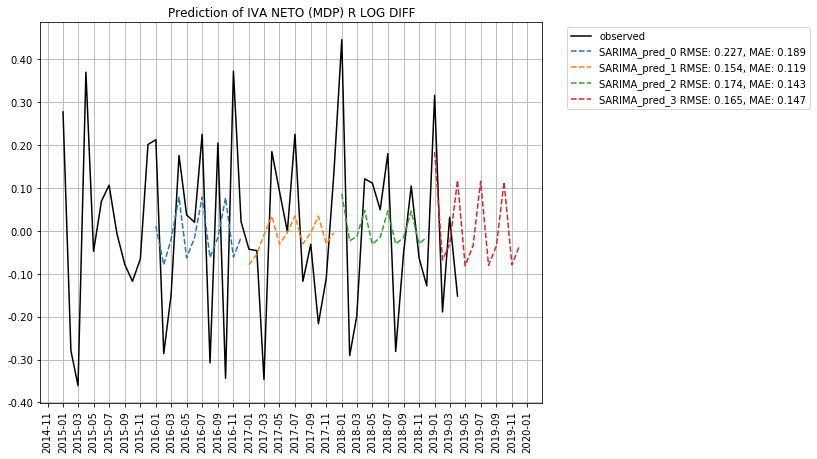

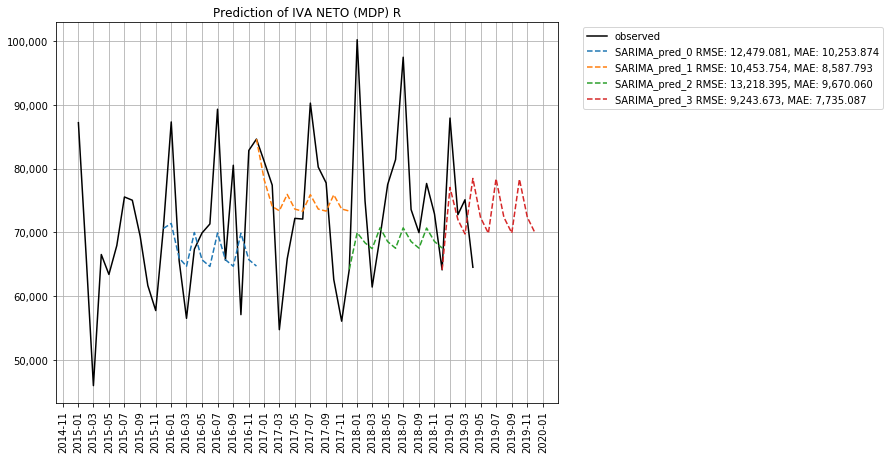

SARIMA: order (3, 0, 3), seasonal_order (0, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


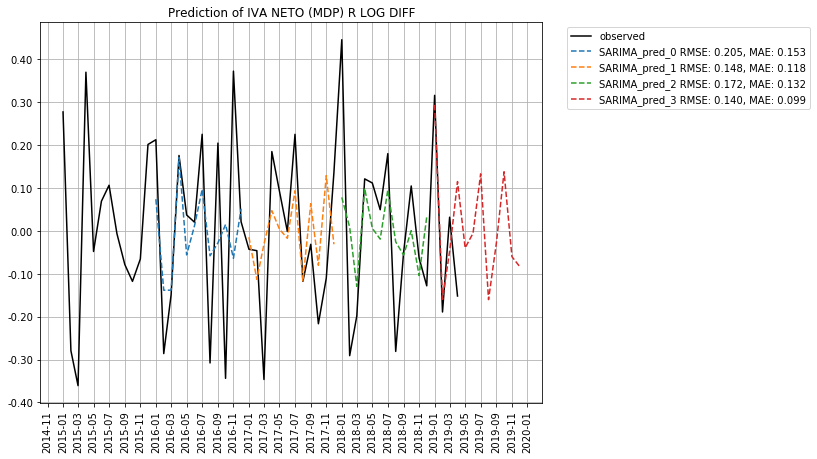

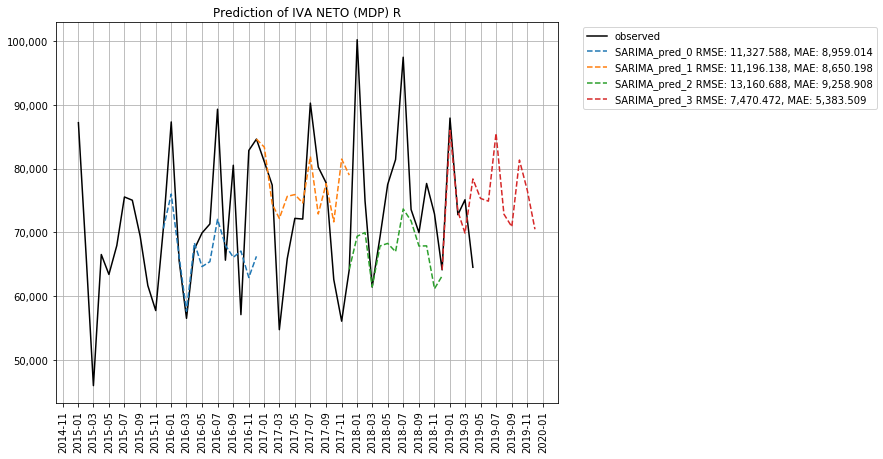

SARIMA: order (3, 0, 3), seasonal_order (1, 0, 0, 12), enforce_stationarity False, enforce_invertibility False, 


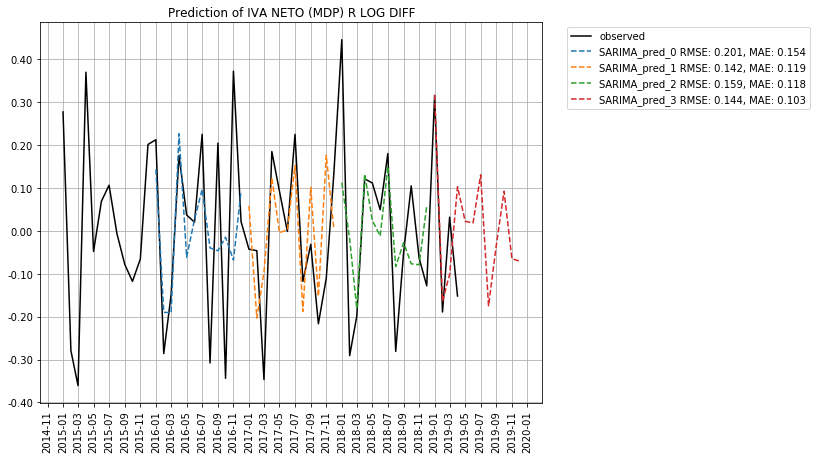

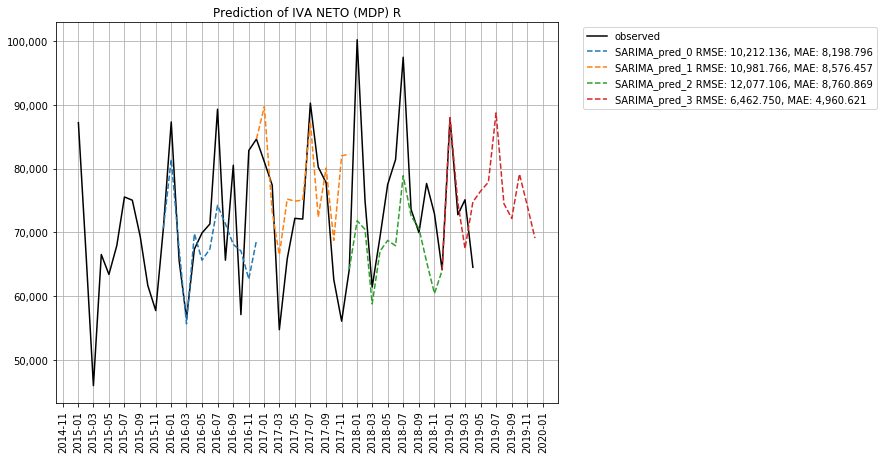

SARIMA: order (3, 0, 3), seasonal_order (1, 0, 1, 12), enforce_stationarity False, enforce_invertibility False, 


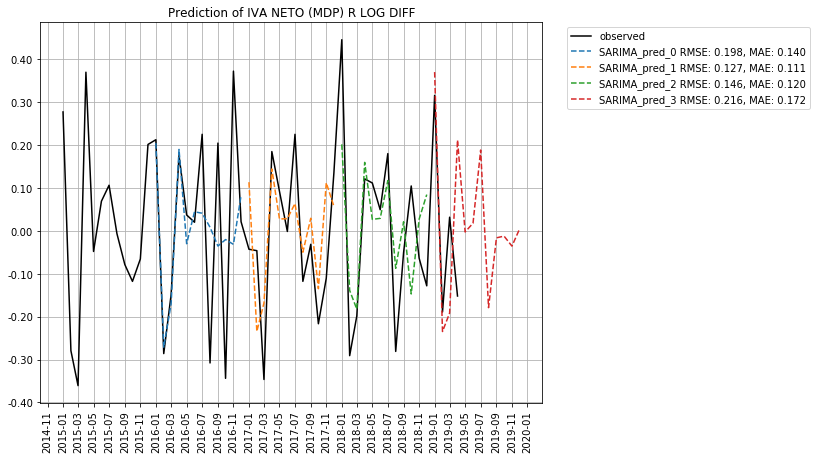

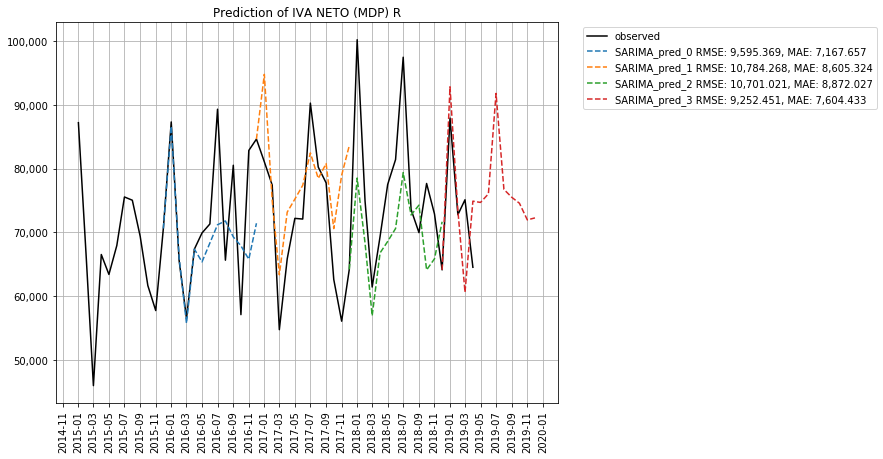

In [56]:
results_sarima = models.run_model_joint('SARIMA', sarima_params, outcome_ts,
                     outcome_ts_tr, params)

# Mechanical
Using PIB and elasticities

Hay diferencias entre datos de do file y estos datos. INPC es diferente. Recaudación y PIB son diferentes en los últimos valores

Las elasticidades de obtuvieron del promedio de elasticidades del último trimestre. (1.1 ISR y 1.3 IVA)

In [64]:
pib_r_df = download.load_pib_r()
pib_r_2013 = pib_r_df['pibr_2013']

In [60]:
params['elasticity'] = {'lag_window': [3, 6], 'elasticity': [None, 1.3]}
                         

In [61]:
elasticity_params = [{'lag_window': lag, 'elasticity': elast} for lag in params['elasticity']['lag_window']
                      for elast in params['elasticity']['elasticity']]

In [62]:
elasticity_params

[{'lag_window': 3, 'elasticity': None},
 {'lag_window': 3, 'elasticity': 1.3},
 {'lag_window': 6, 'elasticity': None},
 {'lag_window': 6, 'elasticity': 1.3}]

ELASTICITY: lag_window 3, elasticity None, 


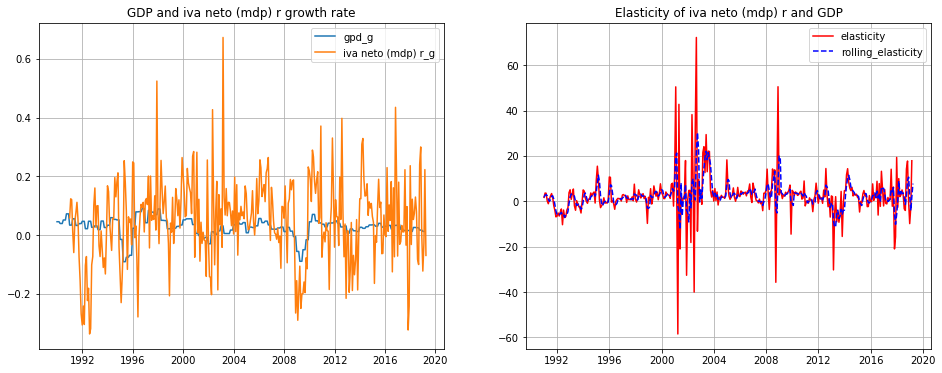

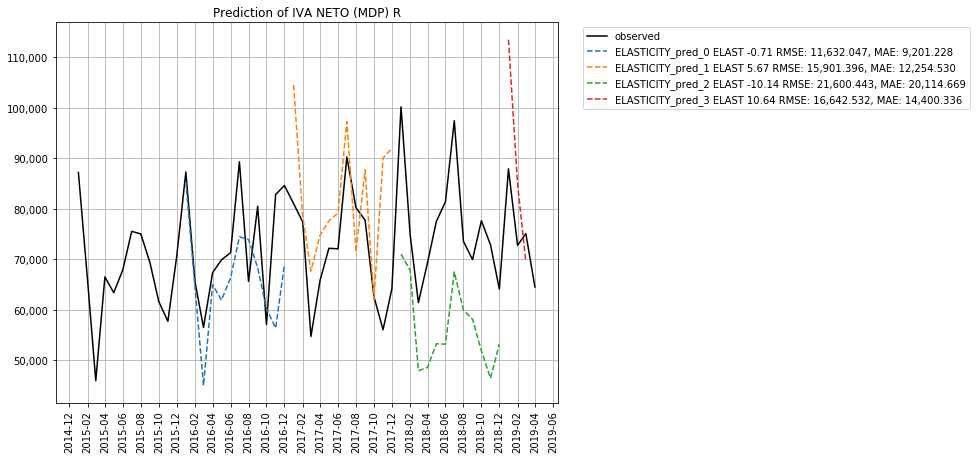

ELASTICITY: lag_window 3, elasticity 1.3, 


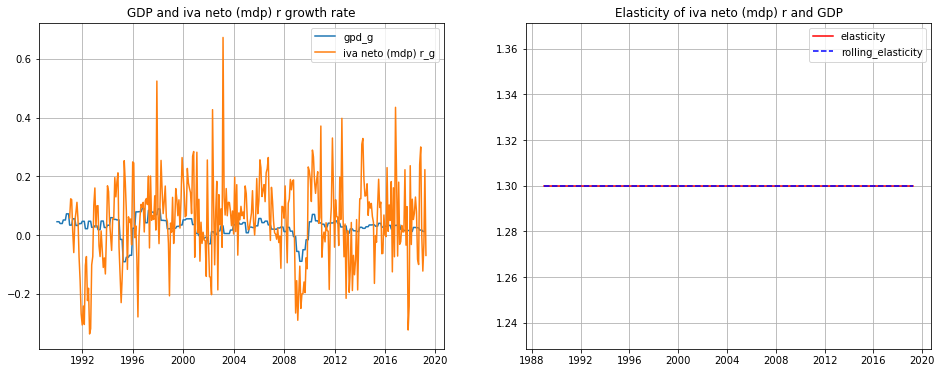

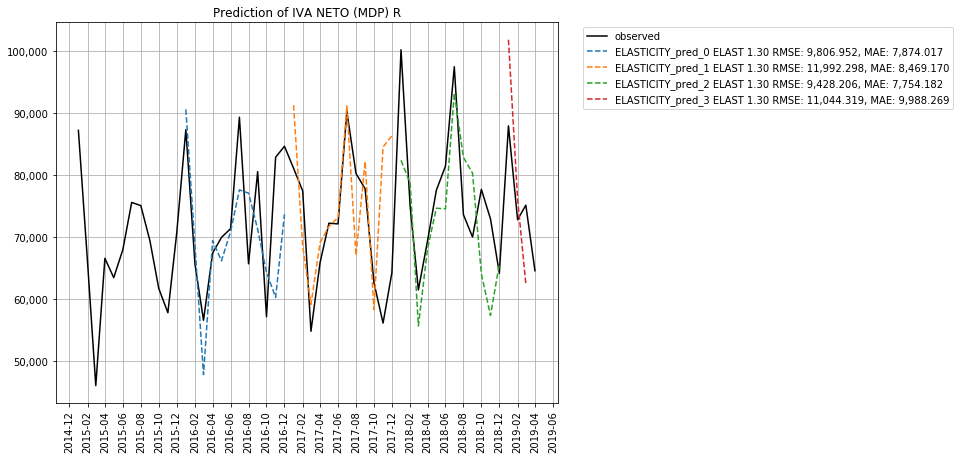

ELASTICITY: lag_window 6, elasticity None, 


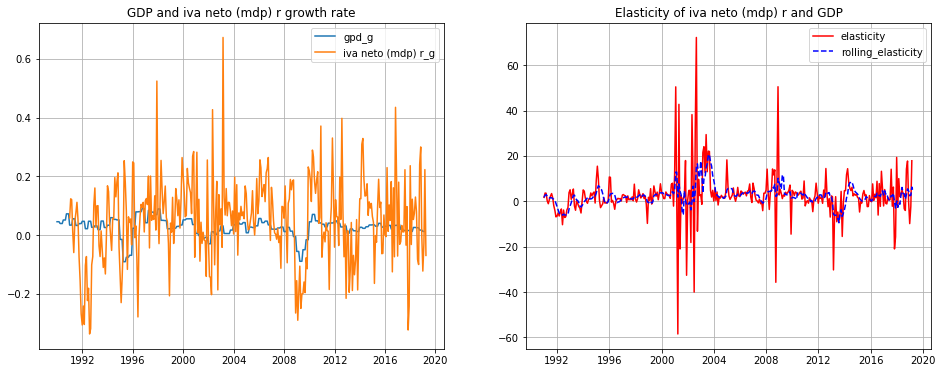

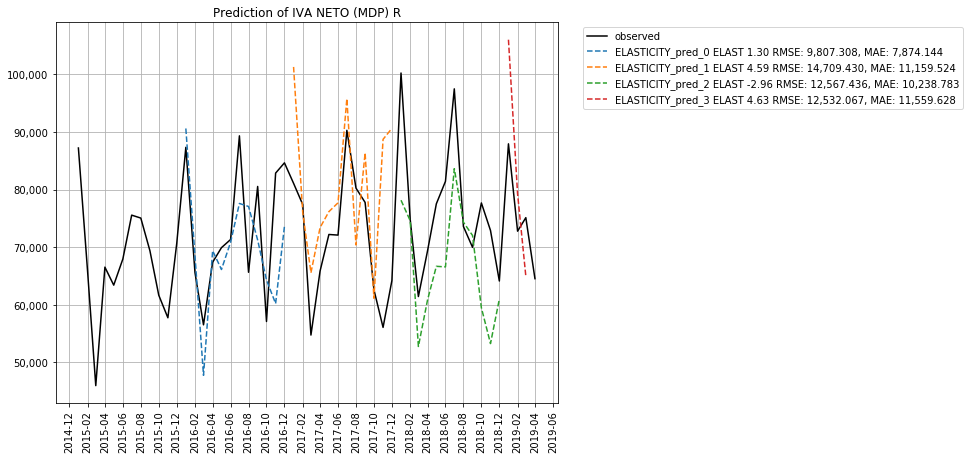

ELASTICITY: lag_window 6, elasticity 1.3, 


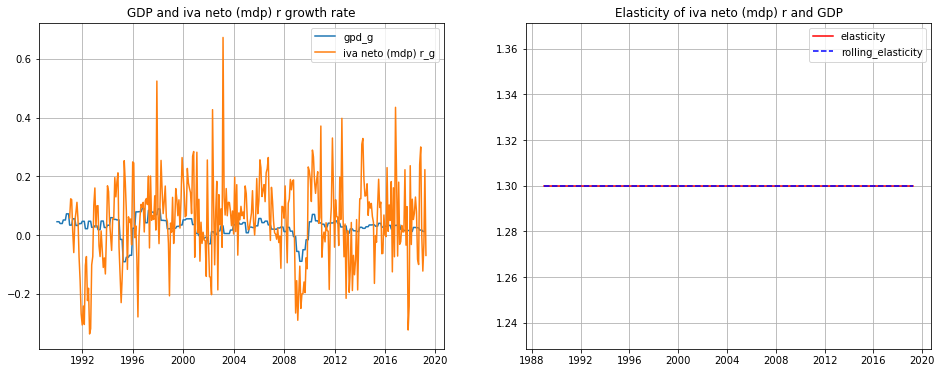

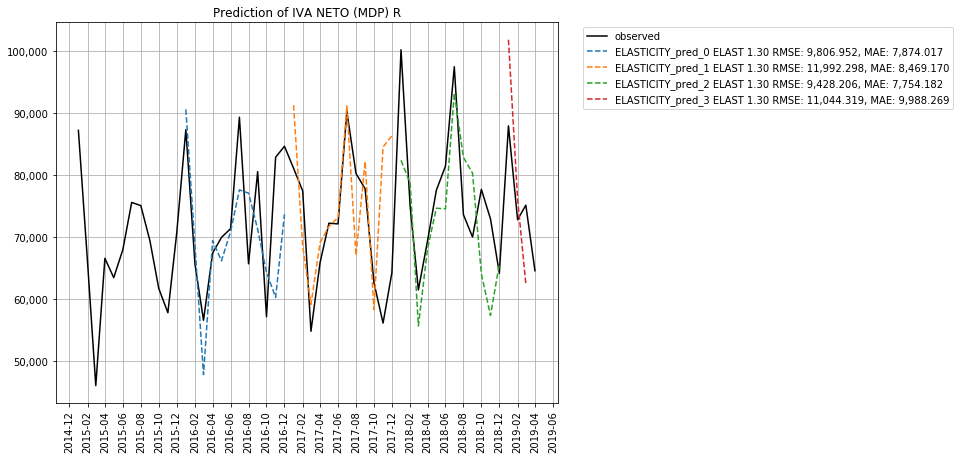

In [71]:
results_mechanical = models.run_model_joint(model_name='ELASTICITY',
                                            model_params=elasticity_params,
                                            outcome_var=outcome_ts,
                                            global_params=params,
                                            covars=pib_r_2013,
                                            plot_extra=True)

# Facebook Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
params['prophet'] = {'seasonality_mode':['additive', 'multiplicative']}

In [ ]:
prophet_params = [{'seasonality_mode': seas} for seas in params['prophet']['seasonality_mode']]

In [ ]:
results_prophet = models.run_prophet(outcome_ts, outcome_ts_tr, prophet_params, params, True)

# Results Analysis

In [ ]:
results_arima`_df = pd.DataFrame(results_arima)
results_sarima_df = pd.DataFrame(results_sarima)
results_mechanical = pd.DataFrame(results_mechanical)
results_prophet = pd.DataFrame(results_prophet)
results = pd.concat([results_arima_df, results_sarima_df, results_mechanical, results_prophet])
col_order = ['model', 'param', 'transformation', 'split_date', 'pred_period', 'dynamic', 'rmse', 'mae']
results = results[col_order]

In [ ]:
results_prophet.sort_values('rmse')

In [ ]:
results = results.loc[(results['split_date'].notna()) & (results['transformation'] == 'log_diff')]

In [ ]:
results.sort_values(['split_date', 'rmse'])

In [ ]:
summary = pd.pivot_table(results,
                         index=['model', 'split_date'],
                         aggfunc='min',
                         fill_value=0)

In [ ]:
summary = summary.reset_index()

In [ ]:
summary

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x="split_date", y="rmse", hue="model",
             data=results, ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Test Start Date")
ax.set_ylabel("Root Mean Squared Error")
ax.set_title("Comparing Accuracy of Models Over Time")
plt.show()